In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

In [4]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06,34.58,3.910000e+12,46,Urban


In [6]:
#  1. Get the total rides for each city type
total_rides_per_city_type = pyber_data_df.groupby(["type"]).count() ["ride_id"]
total_rides_per_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type.
total_drivers_per_city_type = city_data_df.groupby(["type"]).sum () ["driver_count"]
total_drivers_per_city_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# 3. Get the total amount of fares for each city type.
total_amount_fares_per_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_amount_fares_per_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# 4. Get the average fare per ride for each city type. 
avg_fare_ride_city_type = total_amount_fares_per_city_type / total_rides_per_city_type
avg_fare_ride_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver_city_type = total_amount_fares_per_city_type / total_drivers_per_city_type
avg_fare_driver_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
# 6. Create a PyBer summary DataFrame. 
 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_per_city_type,
                                 "Total Drivers": total_drivers_per_city_type,
                                 "Total Fares": total_amount_fares_per_city_type,  
                                 "Average Fare per Ride": avg_fare_ride_city_type,
                                 "Average Fare per Driver": avg_fare_driver_city_type})
                               
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
# Format the columns.
# Format "Total Rides" to have the comma for a thousands separator, a decimal separator.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
# Format "Total Drivers" to have the comma for a thousands separator, a decimal separator.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
# Format "Total Fares" to have the comma for a thousands separator, a decimal separator and a "$".
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
# Format the "Average Fare per Ride" to have the comma for a thousands separator, a decimal separator and a "$".
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
# Format the "Average Fare per Driver" to have the comma for a thousands separator, a decimal separator and a "$".
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

                                                                      
# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [14]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29,13.38,8.550000e+12,6,Rural
2371,Lake Latoyabury,2019-01-30,20.76,9.020000e+12,2,Rural
2372,North Jaime,2019-02-10,11.11,2.780000e+12,1,Rural
2373,West Heather,2019-05-07,44.94,4.260000e+12,4,Rural


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_amount_fares_per_city_type_and_date = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
total_amount_fares_per_city_type_and_date

fare
type  date              
Rural 2019-01-01   43.69
      2019-01-02   52.12
      2019-01-03   19.90
      2019-01-04   24.88
      2019-01-06   47.33
...                  ...
Urban 2019-05-04  323.57
      2019-05-05  322.10
      2019-05-06  181.20
      2019-05-07  258.01
      2019-05-08  170.82

[334 rows x 1 columns]

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_amount_fares_per_city_type_and_date = total_amount_fares_per_city_type_and_date.reset_index()
total_amount_fares_per_city_type_and_date

,type,date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_amount_fares_per_city_type_and_date = total_amount_fares_per_city_type_and_date.pivot(index = 'date', columns = 'type', values = 'fare')
total_amount_fares_per_city_type_and_date.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
2019-01-06,47.33,62.63,202.40
2019-01-07,NaN,155.01,218.02
2019-01-08,19.39,56.82,379.79
2019-01-09,31.84,150.67,231.34


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
From_Date1_to_Date2_df = total_amount_fares_per_city_type_and_date.loc["1/1/2019":"4/29/2019"]
From_Date1_to_Date2_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
From_Date1_to_Date2_df.index = pd.to_datetime(From_Date1_to_Date2_df.index)
From_Date1_to_Date2_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [20]:
# 7. Check that the datatype for the index is datetime using df.info()
From_Date1_to_Date2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2019-01-01 to 2019-05-08
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     80 non-null     float64
 1   Suburban  126 non-null    float64
 2   Urban     128 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


In [26]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_week_df = From_Date1_to_Date2_df.resample('W').sum()
fares_by_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


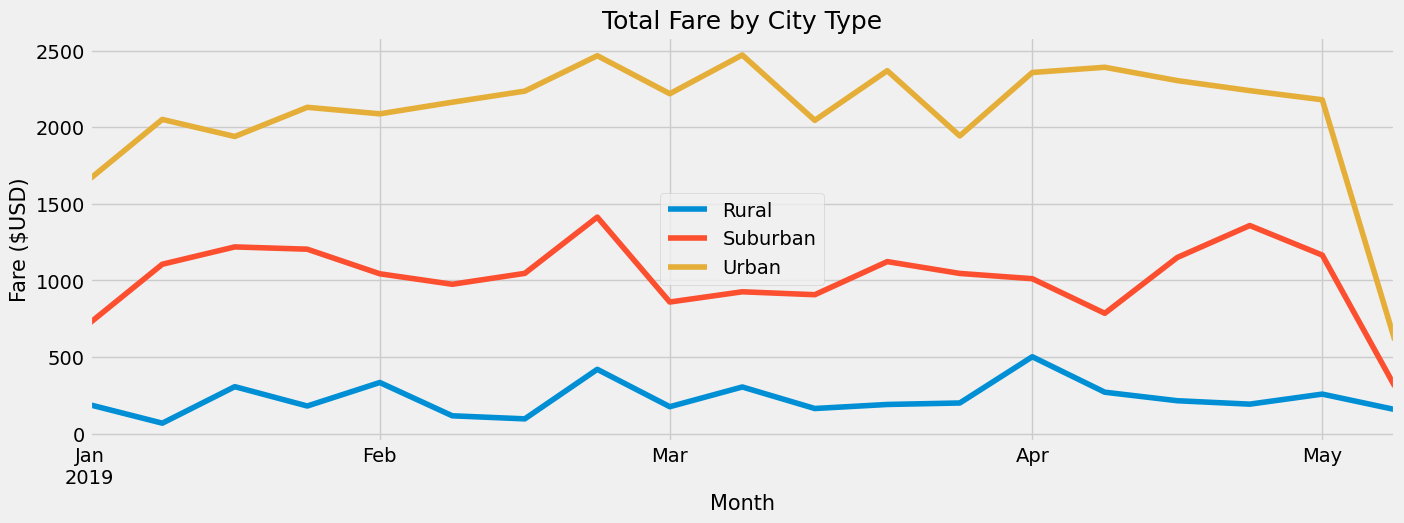

In [31]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fares_by_week_df.plot(figsize=(15, 5))

plt.title("Total Fare by City Type", fontsize=18)
plt.ylabel("Fare ($USD)", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.grid(True)

# Create a legend
plt.legend()

# Show Figure
plt.show()
